<a href="https://colab.research.google.com/github/schizohub/birds_classification/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!cd OIDv4_ToolKit && python main.py

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.
main.py: error: the following arguments are required: <command> 'downloader', 'visualizer' or 'ill_downloader'.


In [5]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content/for_data --classes Turkey Falcon Sparrow Swan Goose Canary Duck Owl Eagle Chicken Raven Woodpecker Magpie Penguin --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Turkey.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 52965 KB/s, 0 seconds passed
[DOWNLOAD] | File c

In [6]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189 kB 29.8 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:40tcmalloc: large alloc 1147494400 bytes == 0x3a296000 @  0x7f076a00f615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.9 kB/s 
     |████████████████████████████████| 55 kB 4.7 MB/s 
     |████████████████████████████████| 127 kB 63.7 MB/s 
     |████████████████████████████████| 21.0 MB 1.1 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled 

In [7]:
from fastai.vision.all import * 
from ipywidgets import * 
import fastai
import torch 
import keras
torch.__version__
# fastai.__version__

'1.10.2+cu102'

In [8]:
path = Path('/content/for_data/train')
path.ls()
fls = get_image_files(path)
failed = verify_images(path)

block = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)


zip argument #1 must support iteration


In [13]:
dls = block.dataloaders(path)

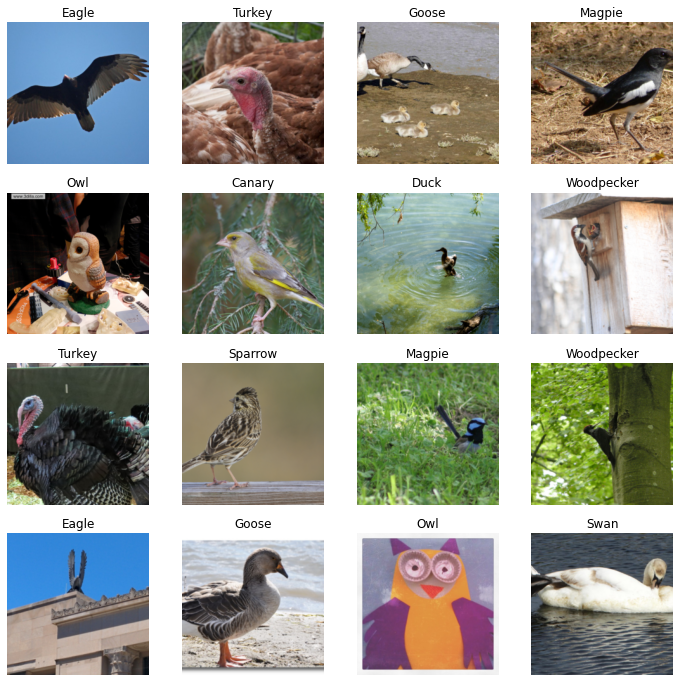

In [14]:
dls.train.show_batch(max_n=16,nrows=4)

In [36]:
resnet = cnn_learner(dls,resnet152,metrics=partial(accuracy_multi, thresh=0.5))
resnet.fine_tune(2)

epoch,train_loss,valid_loss,accuracy_multi,time


AssertionError: ignored

SuggestedLRs(valley=9.120108734350652e-05)

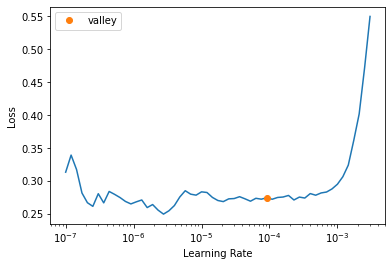

In [32]:
resnet.lr_find()

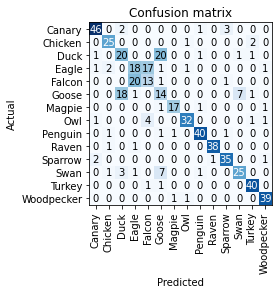

In [31]:
classs = ClassificationInterpretation.from_learner(resnet)
classs.plot_confusion_matrix()

In [29]:
classs.plot_top_losses(1,nrows=1)

NameError: ignored

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
img = "/content/for_data/train/Duck/167ee91896c7a676.jpg"
pred,pred_id,probs = resnet.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")


Prediction: Duck
Probability: 96.3%


Prediction: Magpie
Probability: 100.0%


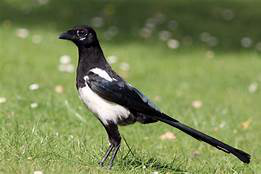

In [ ]:
img = PILImage.create(upload.data[-1])
pred,pred_id,probs = resnet.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")
img

In [ ]:
vgg16_bn = cnn_learner(dls, vgg16_bn, metrics =accuracy)
vgg16_bn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.516153,1.020995,0.658209,01:16


epoch,train_loss,valid_loss,accuracy,time
0,1.140475,0.940143,0.676119,01:11
1,0.909513,0.921589,0.659701,01:15
2,0.718403,0.958530,0.667164,01:12
3,0.557944,0.972368,0.679105,01:12
4,0.439723,0.971934,0.676119,01:10


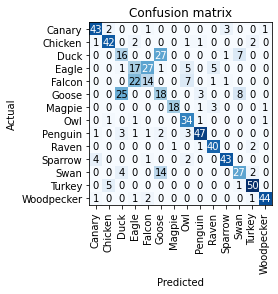

In [ ]:
classs = ClassificationInterpretation.from_learner(vgg16_bn)
classs.plot_confusion_matrix()

In [ ]:
img = "/content/for_data/train/Duck/167ee91896c7a676.jpg"
pred,pred_id,probs = vgg16_bn.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")

Prediction: Duck
Probability: 83.5%


Prediction: Magpie
Probability: 100.0%


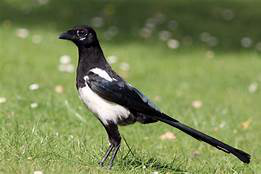

In [ ]:
pred,pred_id,probs = vgg16_bn.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")
img

In [ ]:
vgg19_bn = cnn_learner(dls, vgg19_bn, metrics=accuracy)
vgg19_bn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.423526,1.053634,0.643284,01:09


epoch,train_loss,valid_loss,accuracy,time
0,1.120226,0.929644,0.682090,01:16
1,0.890599,0.984666,0.676119,01:13
2,0.701485,0.919564,0.670149,01:13
3,0.565431,0.948184,0.676119,01:13
4,0.433369,0.944156,0.679105,01:13


In [ ]:
classs = ClassificationInterpretation.from_learner(vgg19_bn)
classs.plot_confusion_matrix()

Prediction: Magpie
Probability: 100.0%


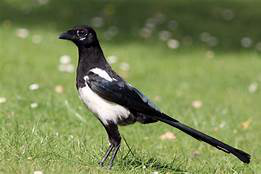

In [ ]:
pred,pred_id,probs = vgg19_bn.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")
img

In [16]:
resnet50 = cnn_learner(dls,resnet50,metrics=accuracy)
resnet50.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.073102,1.154876,0.702206,00:54


epoch,train_loss,valid_loss,accuracy,time
0,1.111856,0.970909,0.722426,00:55
1,0.813663,0.970655,0.720588,00:54


In [ ]:
img = "/content/for_data/train/Duck/167ee91896c7a676.jpg"
pred,pred_id,probs = resnet.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")

Prediction: Duck
Probability: 96.3%


In [18]:
resnet34 = cnn_learner(dls, resnet34, metrics=accuracy)
resnet34.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.476032,0.964127,0.669118,00:48


epoch,train_loss,valid_loss,accuracy,time
0,1.117949,0.860505,0.715074,00:50
1,0.850434,0.866836,0.704044,00:49


In [37]:
resnet50.export("bird_class_resnet50.pkl")

In [38]:
resnet34.export("bird_class_resnet34.pkl")